In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

In [ ]:
default_sr = 22050
n_fft = 2048
duration = 10

In [ ]:
def harmonies(note, duration=10, multiplier=1/3):
  fundamental_hz = librosa.note_to_hz(note)
  rt = librosa.tone(fundamental_hz, duration=duration)
  multiples = 2
  while fundamental_hz * multiples < 8000:
    rt = rt + librosa.tone(fundamental_hz * multiples, duration=duration) * np.power(multiplier, multiples)
    multiples += 1
  return rt

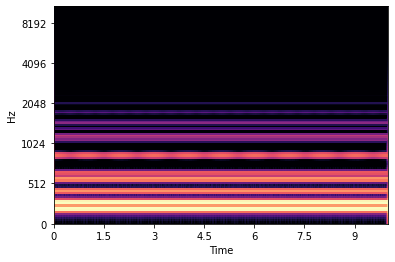

In [ ]:
A3_harmonies = harmonies('A3', duration=duration)
D4_harmonies = harmonies('D4', duration=duration)
mix = (A3_harmonies + D4_harmonies) / 2

fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(y=mix)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', ax=ax)

In [ ]:
mix_cplx_mtx = librosa.stft(mix, n_fft=n_fft)
x = librosa.fft_frequencies(sr=default_sr, n_fft=n_fft) # index to frequency
y = np.array([ 10 * n / mix_cplx_mtx.shape[1] for n in range(mix_cplx_mtx.shape[1]) ])

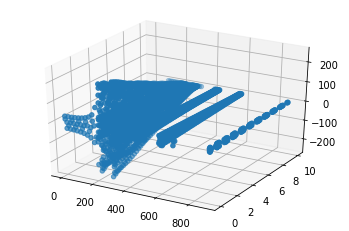

In [ ]:
amp_thershold = 10

xx = []
yy = []
zz = []

for i in range(len(x)):
  if x[i] > 2000:
    continue
  for j in range(len(y)):
    if np.abs(mix_cplx_mtx[i][j]) < amp_thershold:
      continue
    xx.append(x[i])
    yy.append(y[j])
    # zz.append(mix_amp[i][j])
    zz.append((mix_cplx_mtx[i][j] * ( 1 - y[j] / 10)).real)

ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, zz)

In [ ]:
linear_mix_mtx = mix_cplx_mtx * (1-y/10)
logari_mix_mtx = mix_cplx_mtx / np.log(y+1.001)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


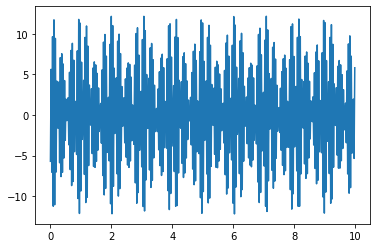

In [ ]:
harmony_index = np.abs(x - librosa.note_to_hz('A5')).argmin()
plt.plot(y, mix_cplx_mtx[harmony_index])

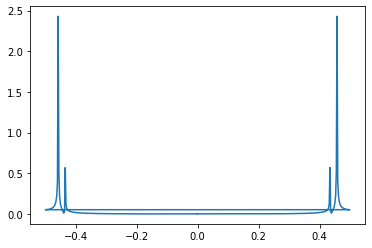

In [ ]:
harmony_index = np.abs(x - librosa.note_to_hz('A5')).argmin()
result = np.fft.fft(mix_cplx_mtx[harmony_index].real) / mix_cplx_mtx.shape[1]
freqs = np.fft.fftfreq(mix_cplx_mtx.shape[-1])
plt.plot(freqs, np.abs(result.real))

In [ ]:
harmony_index = np.abs(x - librosa.note_to_hz('A5')).argmin()
result = librosa.stft(mix_cplx_mtx)